by : Yuval Bar-On

# volcano eruption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import geopandas as gpd

In [2]:
url = 'https://raw.githubusercontent.com/YuvalBaron1997/project2---jupyter-note-book/main/database.csv'
data = pd.read_csv(url)
df = data.copy()
df.head()


,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [3]:
# טיפול בערכים

In [4]:
df.rename(columns = {'Last Known Eruption':'Last'}, inplace = True)
df['Last'] = df['Last'].str.replace('CE', '', regex = False)
df.Last = np.where(df.Last.str.contains('B'), '-' + df.Last, df.Last)
df['Last'] = df['Last'].str.replace('B', '', regex = False)

In [5]:
df['unknown']=df['Last']
df.loc[df.unknown != 'Unknown' , 'unknown'] = '0'
df.loc[df.unknown == 'Unknown' , 'unknown'] = '1'
df['unknown'] = df['unknown'].astype(float)

In [6]:

df['Last'] = pd.to_numeric(df['Last'], errors='coerce', downcast="float")
df.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,unknown
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,-8300.0,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km),0.0
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,-4040.0,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),0.0
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,NaN,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km),1.0
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,-3600.0,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),0.0
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282.0,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km),0.0


In [7]:
df['Country'].value_counts()

United States                173
Russia                       145
Indonesia                    139
Japan                        112
Chile                         76
                            ... 
Mexico-Guatemala               1
Ethiopia-Eritrea-Djibouti      1
Guatemala-El Salvador          1
El Salvador-Guatemala          1
Germany                        1
Name: Country, Length: 100, dtype: int64

<AxesSubplot:ylabel='unknown'>

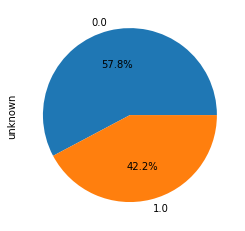

In [8]:
df['unknown'].value_counts().plot.pie(autopct='%1.1f%%')

In [9]:
two_countries= df.loc[(df.Country== 'United States') | (df.Country== 'Russia')]
#two_countries = two_countries.dropna()

<AxesSubplot:xlabel='Last', ylabel='Count'>

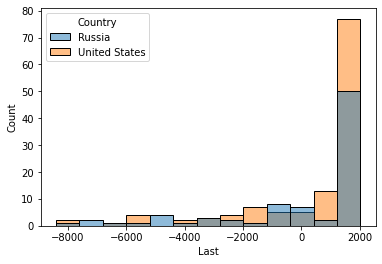

In [10]:
plt.ticklabel_format(style='plain')
sns.histplot(data=two_countries,x='Last', hue='Country', multiple = 'layer')

In [11]:
two_countries= two_countries.loc[(two_countries.Last >= 0)]
two_countries.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,unknown
36,214010,Elbrus,Russia,Mediterranean and Western Asia,Stratovolcano,Eruption Dated,50.0,43.351,42.442,5642,Dacite,Intraplate / Continental Crust (>25 km),0.0
271,244000,Vailulu'u,United States,New Zealand to Fiji,Submarine,Eruption Observed,2003.0,-14.215,-169.058,-592,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km),0.0
273,244010,Ofu-Olosega,United States,New Zealand to Fiji,Shield(s),Eruption Observed,1866.0,-14.175,-169.618,639,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km),0.0
661,284133,Fukujin,United States,"Japan, Taiwan, Marianas",Submarine,Eruption Observed,1974.0,21.930,143.470,-217,Andesite / Basaltic Andesite,Subduction Zone / Crust Thickness Unknown,0.0
662,284134,Kasuga 1,United States,"Japan, Taiwan, Marianas",Submarine,Eruption Observed,1959.0,21.765,143.710,-598,Andesite / Basaltic Andesite,Subduction Zone / Crust Thickness Unknown,0.0


<AxesSubplot:xlabel='Last', ylabel='Count'>

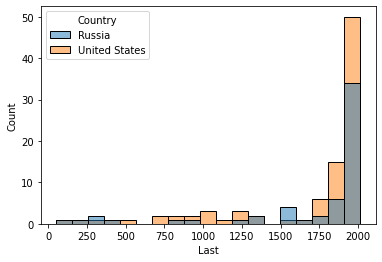

In [12]:
plt.ticklabel_format(style='plain')
sns.histplot(data=two_countries,x='Last', hue='Country', multiple = 'layer')

<AxesSubplot:ylabel='unknown'>

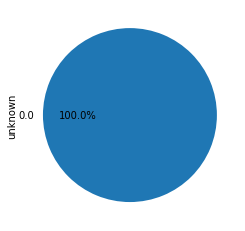

In [13]:
two_countries['unknown'].value_counts().plot.pie(autopct='%1.1f%%')

In [14]:
# משנת 0 יעני מאז שהתחילו בספירה אז כל ההתפרצויות שהיו ברוסיה וארהב ידועות.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

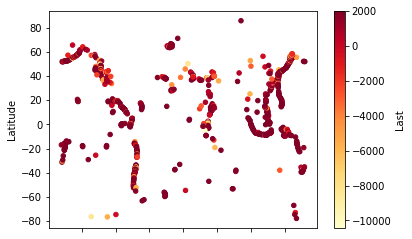

In [15]:
df.plot(x="Longitude", y="Latitude", kind="scatter", c="Last",
        colormap="YlOrRd")

In [16]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

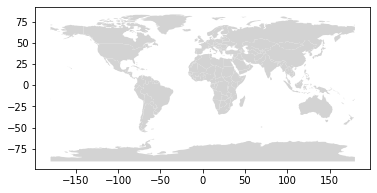

In [17]:
countries.plot(color="lightgrey")

C:\Users\yuval\AppData\Local\Temp\ipykernel_22064\4033751012.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


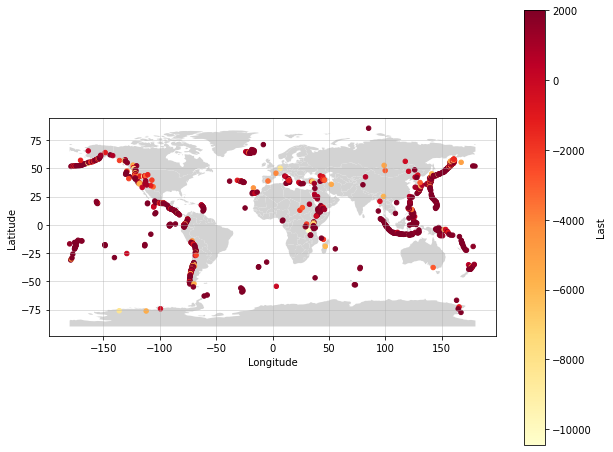

In [18]:
# initialize an axis
fig, ax = plt.subplots(figsize=(10,8))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",ax=ax)
# parse dates for plot's title
#first = df["Last"].min().strftime("%b %Y")
#last = df["Last"].max().strftime("%b %Y")
# plot points
df.plot(x="Longitude", y="Latitude", kind="scatter", 
        c="Last", colormap="YlOrRd", ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()